In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)



# Convert slow_ln_temp to its original temperature scale for plotting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Slope of the log-log plot: 1.0135618206413577
Slope of the log-log plot: -1.012890642186567


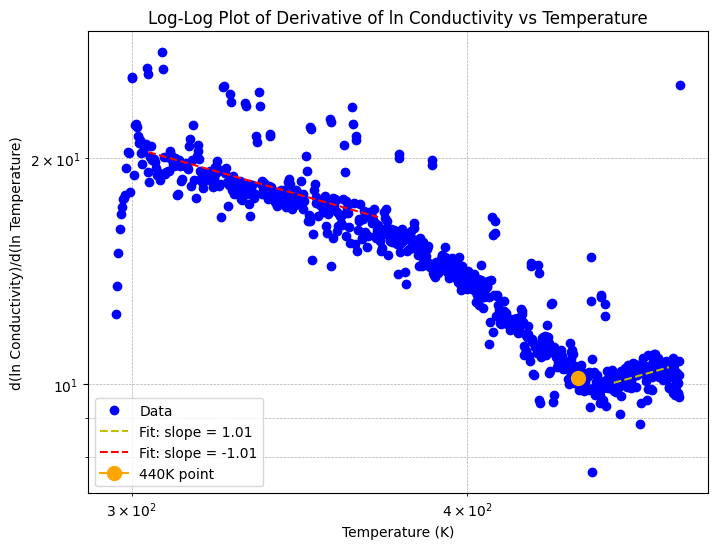

In [2]:
# Read the data
fast_cool = pd.read_csv("/workspaces/kakalioslab/another_slow_and_fast_cooling/data folder/fast_cool_up_470.csv")
slow_cool = pd.read_csv("/workspaces/kakalioslab/another_slow_and_fast_cooling/data folder/slow_cool_up_470.csv")

fast_temp = fast_cool["Temperature (K)"]
fast_cond = fast_cool["Conductivity (Ohm-cm)^-1"]
slow_temp = slow_cool["Temperature (K)"]
slow_cond = slow_cool["Conductivity (Ohm-cm)^-1"]

fast_ln_cond = np.log(fast_cond)
slow_ln_cond = np.log(slow_cond)
fast_ln_temp = np.log(fast_temp)
slow_ln_temp = np.log(slow_temp)

slow_W = np.gradient(slow_ln_cond, slow_ln_temp)
slow_ln_W = np.log(slow_W)

fast_W = np.gradient(fast_ln_cond, fast_ln_temp)
fast_ln_W = np.log(fast_W)

i = 608
j = 700
a = 30
b = 280


slope_slow1, intercept_slow1, r_value1, p_value1, std_err1 = linregress(slow_ln_temp[i:j], slow_ln_W[i:j])
slope_slow2, intercept_slow2, r_value2, p_value2, std_err2 = linregress(slow_ln_temp[a:b], slow_ln_W[a:b])

print(f"Slope of the log-log plot: {slope_slow1}")
print(f"Slope of the log-log plot: {slope_slow2}")

fitted_line_slow1 = np.exp(intercept_slow1) * slow_temp ** slope_slow1
fitted_line_slow2 = np.exp(intercept_slow2) * slow_temp ** slope_slow2
        
plt.figure(figsize=(8, 6))
plt.loglog(slow_temp, slow_W, marker='o', linestyle='none', color='b', label='Data')
plt.loglog(slow_temp[i:j], fitted_line_slow1[i:j], linestyle='--', color='y', label=f'Fit: slope = {slope_slow1:.2f}')
plt.loglog(slow_temp[a:b], fitted_line_slow2[a:b], linestyle='--', color='r', label=f'Fit: slope = {slope_slow2:.2f}')
plt.loglog(440, 10.2, marker='o', markersize=10, color='orange', label="440K point")
plt.xlabel('Temperature (K)')
plt.ylabel('d(ln Conductivity)/d(ln Temperature)')
plt.title('Log-Log Plot of Derivative of ln Conductivity vs Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()